# Project: Investigate a Dataset (Medical appointment)



# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## intro
Getting the data from Kaggle to analyze the people behavior toward  the attendnace of the appointment. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### lets start with question to make our brain goes around the data. 
# What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [5]:
# lets explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
def change_dtype(date):
    if date== "": 
        return None 
    else: 
        return pd.to_datetime(df['ScheduledDay'])

In [8]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

In [9]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [10]:
# drop unwanted columns

df.drop(['Neighbourhood'], axis=1,inplace =True)

In [11]:
#check if any null values. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(2)
memory usage: 11.0+ MB


In [12]:
# is there any duplaiced values? 

df.duplicated().sum()

0

In [13]:
#check columns having zero values. 

df.loc[~(df==0).all(axis=1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,0,0,0,0,0,0,No


In [14]:
# change column name for better use. 
df.rename (columns={'No-show':'attendnace'}, inplace=True)

In [15]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attendnace
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No


In [16]:
# convert the string into int to see the correlation. 

df['attendnace'].replace('No',1 , inplace=True)

In [17]:
df['attendnace'].replace('Yes',0 , inplace=True)

In [18]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attendnace
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,1
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,0,1,0,0,0,0,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,0,0,0
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,0,0,0
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,0,0,0,0,0,0,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,0,0,0,0,0,0,1


In [19]:
df['attendnace'].value_counts()

1    88208
0    22319
Name: attendnace, dtype: int64

In [20]:
# now lets make some visulaization to see data pattern and relations. 
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

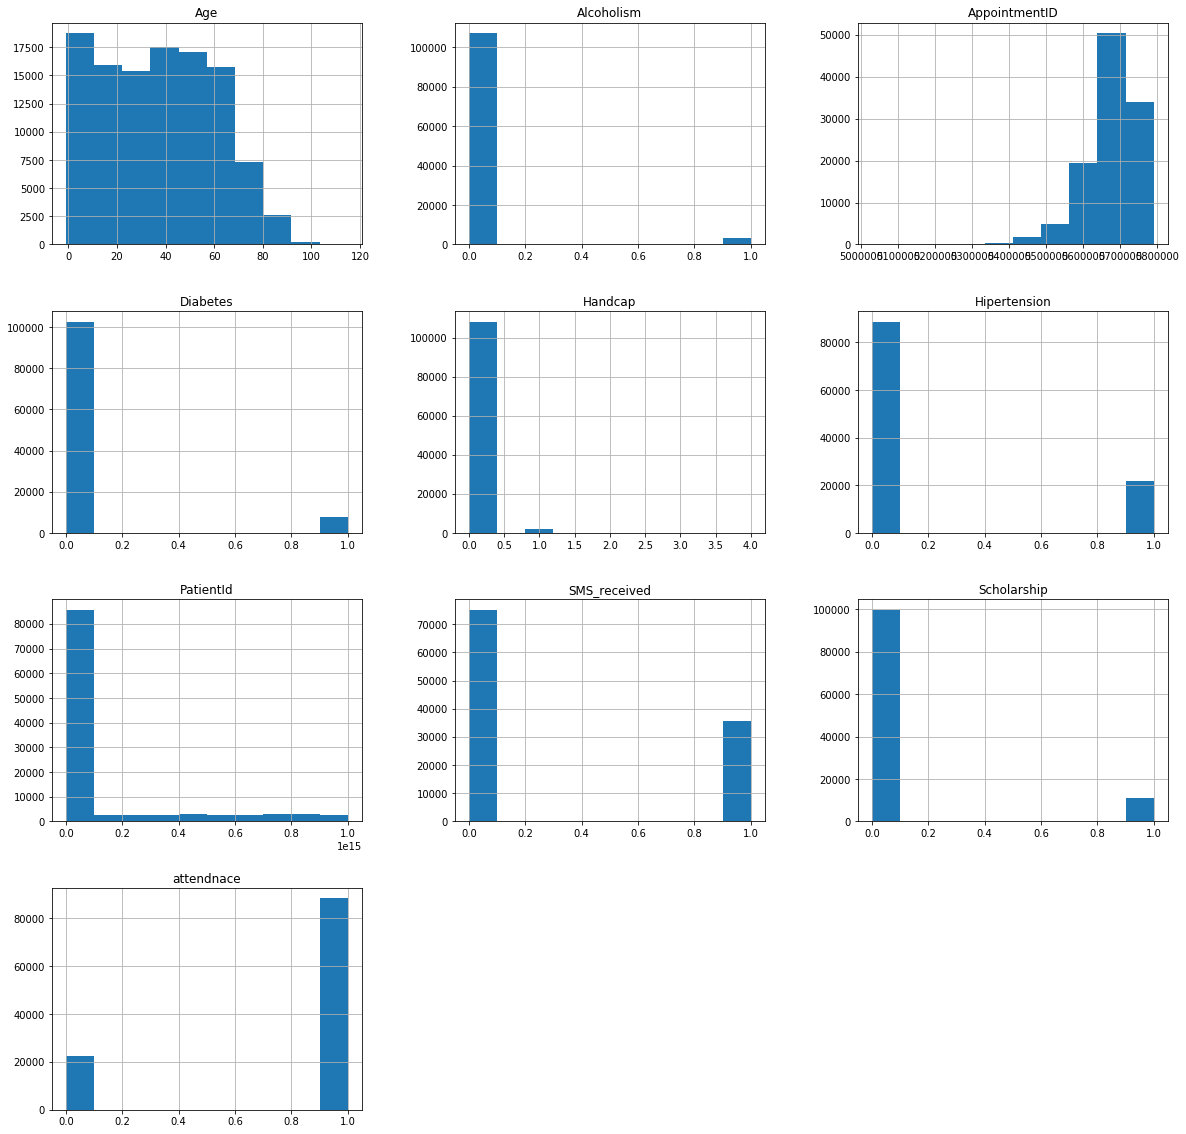

In [45]:
df.hist(figsize=(20,20));

mostly they are healthy visitor with no issues such as Handcap , daibetes or Hipertension.

In [46]:
df['day']= df.ScheduledDay.dt.weekday_name



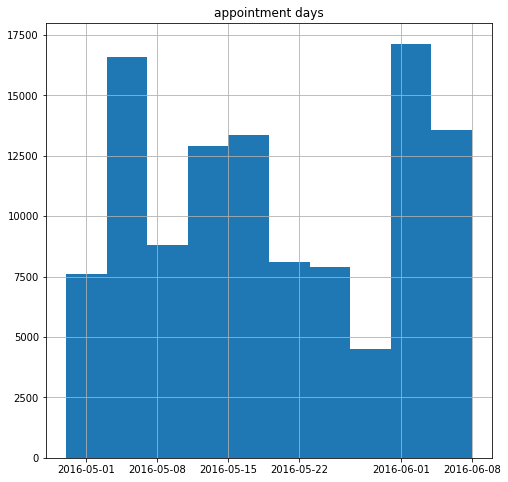

In [80]:
df['AppointmentDay'].hist(figsize=(8,8),).set(title='appointment days');

## What is the frequent gender to visit Dr.  


### from the below chart we can idenify the gender that visit more, it shows us the health condition or awarness of the gender. 

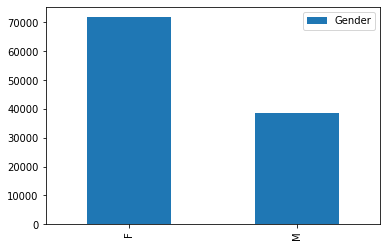

In [47]:
df['Gender'].value_counts().plot(kind='bar', legend=True);

## detecting outliers

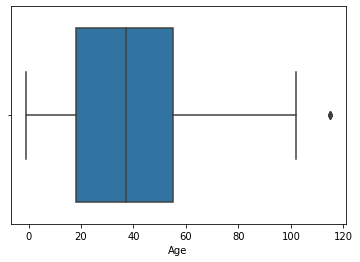

In [25]:
sns.boxplot(df['Age']);

## removing the outliers with new data range. 

In [26]:
## what is the mean age? 
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [27]:
#remove the outlier

new_df=df[(df.Age < 80 ) & (df.Age >= 0 )]

new_df['Age'].describe()

count    107163.000000
mean         35.599498
std          21.848554
min           0.000000
25%          17.000000
50%          36.000000
75%          54.000000
max          79.000000
Name: Age, dtype: float64

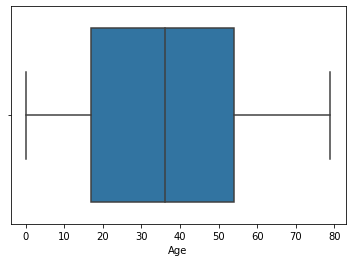

In [49]:
sns.boxplot(new_df['Age'],whis=2);

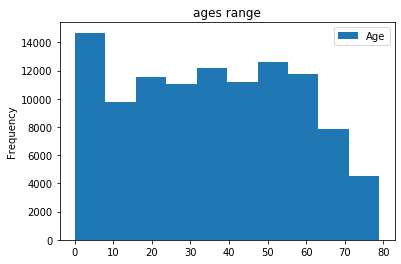

In [29]:
new_df['Age'].plot(kind='hist', legend=True).set(title='ages range');

In [61]:
bin_edges = [0,13,40,80]

In [62]:

bin_names = ['child', 'adult', 'seniors']

In [63]:
# Creates age rating column
new_df['age_rate'] = pd.cut(new_df['Age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
new_df.head()

C:\Users\alref\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attendnace,day,age_rate
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,1,Friday,seniors
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,1,Friday,seniors
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,1,Friday,seniors
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,1,Friday,child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,1,Friday,seniors


## which age rate got more appointment? 
from the data we can see that the range of seniors are having the more appointment than others, and that logic due to their health condition and requirments. 

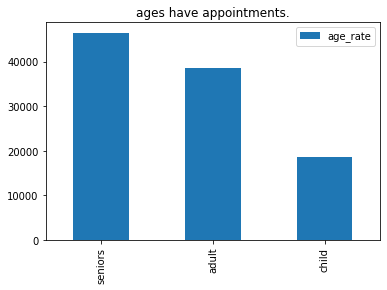

In [64]:
age_attneded= new_df['age_rate'].value_counts()

age_attneded.plot(kind='bar', legend=True).set(title='ages have appointments.');

# what is the relation between having scholarship and attendnace. Does that affect the reults? 

###   from the below we can see that seniors attended more than others and at same time no scholarship granted to them . that would open our eyes to different view of the data , seniors are able to pay their medical requirments and their health conditions requiring them to see the doctors. In the second plot its very clear that, adult recieved less messages than others which migh led to have less attendnace as main factor for poor attendnace. 

C:\Users\alref\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


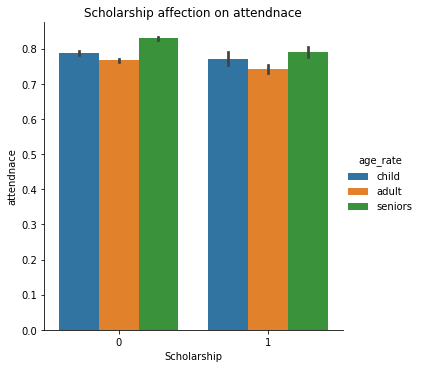

In [65]:
sns.factorplot(x='Scholarship', y='attendnace', hue='age_rate', data=new_df, kind='bar').set(title='Scholarship affection on attendnace');

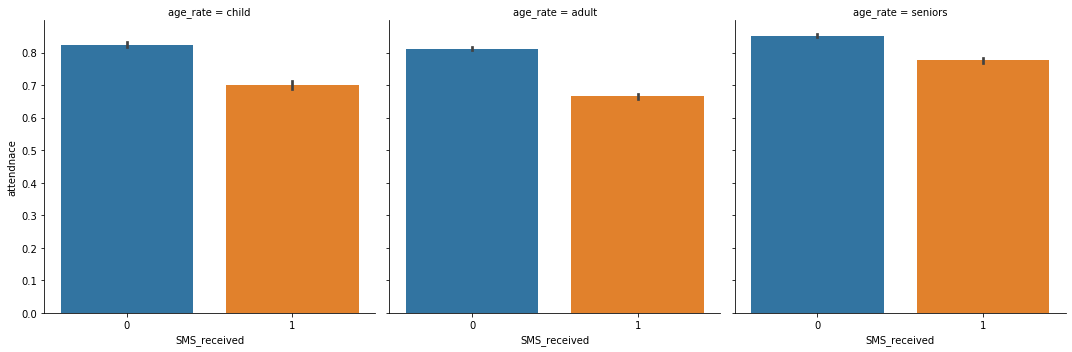

In [66]:
#This plots are showing the ages rate that recieved the messages. 


m=sns.factorplot("SMS_received", "attendnace", col="age_rate", data=new_df, kind="bar");

In [67]:
new_df['age_rate'].value_counts()

seniors    46480
adult      38544
child      18600
Name: age_rate, dtype: int64

In [68]:
# groupby to see Age would likely to be  not there 
df_age_rate= new_df.groupby('age_rate').attendnace.mean()
df_age_rate

age_rate
child      0.786505
adult      0.763595
seniors    0.826872
Name: attendnace, dtype: float64

In [69]:
new_df.groupby('Scholarship').mean()

,PatientId,AppointmentID,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attendnace
Scholarship,,,,,,,,,
0,1.479257e+14,5.674881e+06,36.165744,0.184901,0.069224,0.029104,0.020403,0.322964,0.800729
1,1.452614e+14,5.680179e+06,30.574088,0.172779,0.052341,0.048655,0.018061,0.322705,0.762532


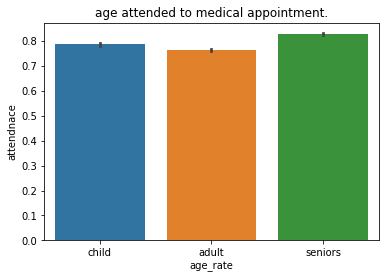

In [79]:
# Ages are more liklely to show up.

k= sns.barplot( x='age_rate', y='attendnace',  data= new_df);
k.set_title('age attended to medical appointment.');

# what is the highest catogry of person would like to show up to the appointments? 


### i would go with senior female will highly possible to show up to their appointment. 


In [71]:
new_df['day'].value_counts()

Tuesday      25392
Wednesday    23588
Monday       22383
Friday       18293
Thursday     17483
Saturday        24
Name: day, dtype: int64

In [72]:
new_df_days= new_df.groupby('day').attendnace.mean()
new_df_days

day
Friday       0.792762
Monday       0.801054
Saturday     0.958333
Thursday     0.793857
Tuesday      0.796708
Wednesday    0.798287
Name: attendnace, dtype: float64

## which days have high percent of attendance?

### satuday having the highest perecent due to off day. 





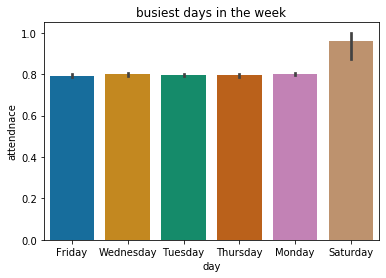

In [87]:
# the plot show what is the most buisies day of the week. 

sns.barplot(x='day', y='attendnace',data=new_df, palette='colorblind').set(title='busiest days in the week');

# Conclusions. 


based on the data, there are some observations that i would like to highlight: 
  - data used wrong data types( date format was str)
  - some unwanted data was droped as its not going to be used. 
  - females are more participants than men to medical appointments. 
  - some ages was out of range and was removed. 
  - the chart shows that , seniors are more likely to attend than other ages , i have observed two reasons based on the data,   1 they recieve more msgs. 2- they might be able to pay the cost do to their income. in addition might be they are more      careful about their health. 

  - Saturday is the most busiest day of the week due to off from work, school etc. 

## limitation: 
- most values are 0 and 1
- age outliers played role in misiing calculation if not found. 
- unneeded data such as neighbourhood. 
- ages required rating to identify catgories. 

